<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/3_LinearRegression/4_L1_L2_loss_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

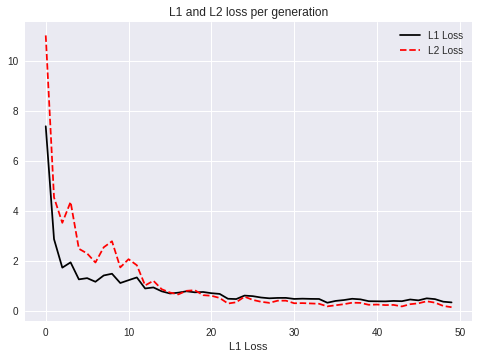

In [4]:
# Understanding Loss functions in Linear Regression
# Illustrate how L1 and L2 functions affect convergence in Linear Regression

# Load libs, start session, load data, create placeholders and define model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 25
learning_rate = 0.1
iterations = 50
x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

# L1 loss 
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

# L2 loss = 
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# Initialize variables, declare optimizer, and looping them through training
init = tf.global_variables_initializer()
sess.run(init)
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

loss_vec_l1 = []
loss_vec_l2 = []
for i in range(iterations):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec_l1.append(temp_loss_l1)
  #if (i+1)%25==0:
  #  print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    
  sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec_l2.append(temp_loss_l2)
  #if (i+1)%25==0:
  #  print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

  
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 loss per generation')
plt.xlabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()
